## Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Inspiration
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. [Calibrating Probability with Undersampling for Unbalanced Classification](https://www.researchgate.net/publication/283349138_Calibrating_Probability_with_Undersampling_for_Unbalanced_Classification). In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. [Learned lessons in credit card fraud detection from a practitioner perspective](https://www.researchgate.net/publication/260837261_Learned_lessons_in_credit_card_fraud_detection_from_a_practitioner_perspective), Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. [Credit card fraud detection: a realistic modeling and a novel learning strategy](https://www.researchgate.net/publication/319867396_Credit_Card_Fraud_Detection_A_Realistic_Modeling_and_a_Novel_Learning_Strategy), IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea [Adaptive Machine learning for credit card fraud detection](http://di.ulb.ac.be/map/adalpozz/pdf/Dalpozzolo2015PhD.pdf) ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. [Scarff: a scalable framework for streaming credit card fraud detection with Spark](https://www.researchgate.net/publication/319616537_SCARFF_a_Scalable_Framework_for_Streaming_Credit_Card_Fraud_Detection_with_Spark), Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. [Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization](https://www.researchgate.net/publication/332180999_Deep-Learning_Domain_Adaptation_Techniques_for_Credit_Cards_Fraud_Detection), International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi [Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection](https://www.researchgate.net/publication/332180999_Deep-Learning_Domain_Adaptation_Techniques_for_Credit_Cards_Fraud_Detection), INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi [Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection](https://www.researchgate.net/publication/333143698_Combining_Unsupervised_and_Supervised_Learning_in_Credit_Card_Fraud_Detection) Information Sciences, 2019

In [3]:
# import neccessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


import warnings 
warnings.filterwarnings('ignore')

/Users/mukeshchaudhary/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
# import data 


df_original  = pd.read_csv("creditcard.csv")

df = df_original.copy()

In [5]:
# information 

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
# check null values

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# general statistics

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# shape of dataframe

df.shape

(284807, 31)

## Data Exploration


0:No Fraud | 1: Fraud 
************************

0    284315
1       492
Name: Class, dtype: int64


Text(0.5, 1.0, ' Class Distribution \n 0:No Fraud | 1: Fraud')

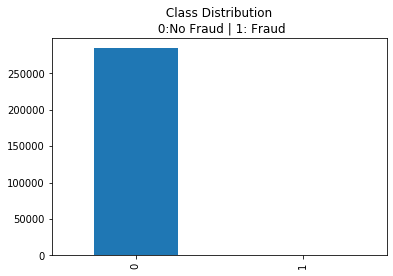

In [10]:
# check balanced of Class 

print("\n0:No Fraud | 1: Fraud ")
print("************************\n")
print(df['Class'].value_counts())

df['Class'].value_counts().plot(kind='bar')
plt.title(" Class Distribution \n 0:No Fraud | 1: Fraud")

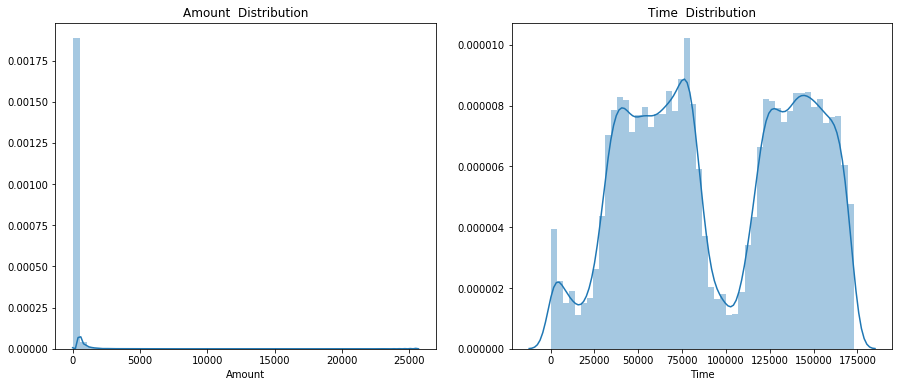

In [11]:
# Time and Amount Data distribution

def features_distribution(df,features):
    
    if int(len(features)%2) == 0 :
        rows = int(len(features)/2)
        columns = 2
    elif int(len(features)) == 1:
        rows =1
        columns =1
    else :
        rows = int(len(features)/2)+1
        columns = 2
        
        
    
    fig , axs = plt.subplots(nrows = rows,ncols = columns,figsize = (15,6))
    
    for ax,feature in zip(list(axs),features):
        sns.distplot(df[feature],ax =ax)
        ax.set_title( feature + " " + " Distribution")

       # sns.distplot(df['Amount'],ax=ax[1],color='red')
       # ax[1].set_title("Amount Distribution")
        
        
features_distribution(df,['Amount','Time'])       

In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0.5, 1.0, ' V4 Distribution')

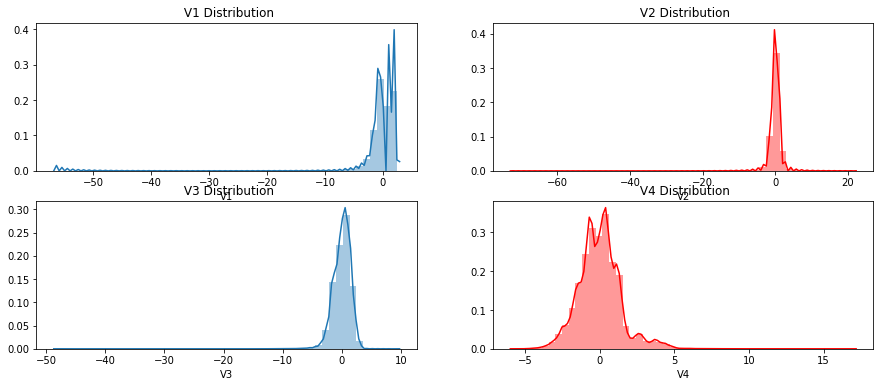

In [12]:

fig ,ax = plt.subplots(2,2,figsize = (15,6))

sns.distplot(df['V1'],ax =ax[0][0])
ax[0][0].set_title(" V1 Distribution")

sns.distplot(df['V2'],ax=ax[0][1],color='red')
ax[0][1].set_title(" V2 Distribution")

sns.distplot(df['V3'],ax =ax[1][0])
ax[1][0].set_title(" V3 Distribution")

sns.distplot(df['V4'],ax=ax[1][1],color='red')
ax[1][1].set_title(" V4 Distribution")

In [13]:
# for outliers

from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] =rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

df['scaled_time'] =rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))


df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274,-0.994983
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825,-0.994983
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,-0.994972
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291,-0.994972
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579,-0.994960


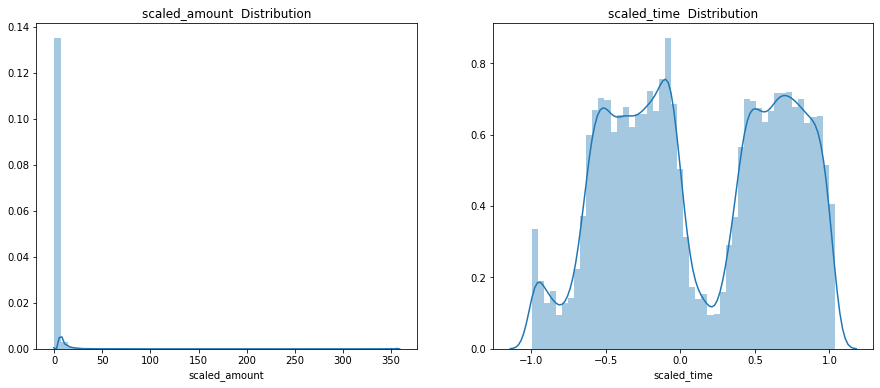

In [14]:
# again check data distribution


features_distribution(df,['scaled_amount','scaled_time'])

In [15]:
# delete non-scale features from dataframe

df.drop(columns=['Time','Amount'],inplace = True)

In [16]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


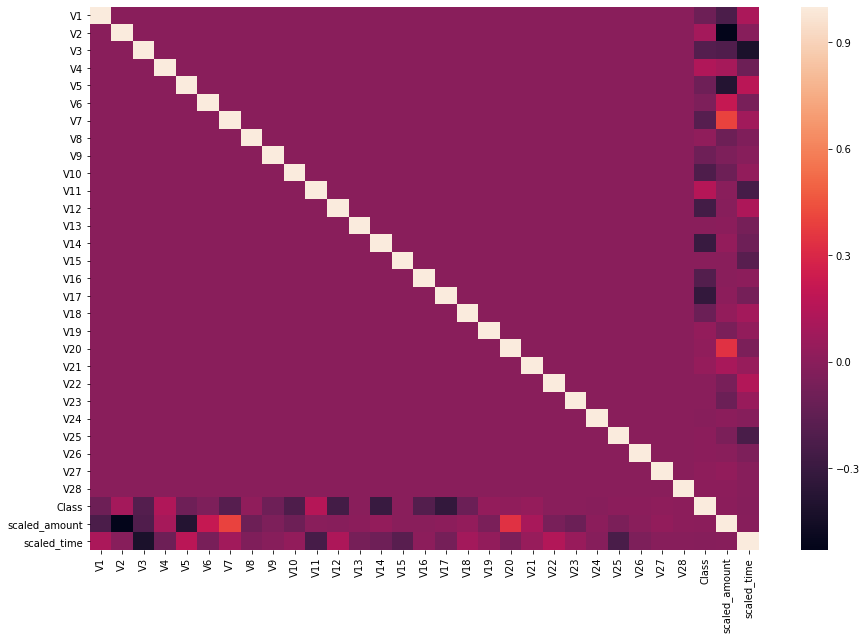

In [17]:
# for correlation

fig,ax = plt.subplots(1,1,figsize=(15,10))

corr = df.corr()

sns.heatmap(corr,ax = ax)

Here, Between features , There are no high correlation indication.

In [18]:
# Dimensionality Reduction and Clustering

from sklearn.decomposition import PCA, TruncatedSVD

import time

In [19]:
# seperate label and features 

X = df.drop('Class',axis  =1)
y = df['Class']



 No of components  21


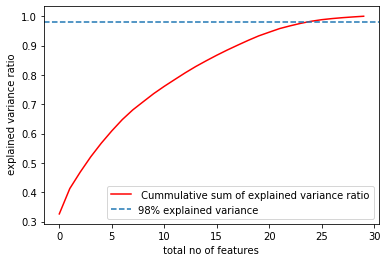

In [20]:
# PCA 
# find n_components for PCA 


pca = PCA()

pca.fit_transform(X)

cumtotal = np.cumsum(pca.explained_variance_ratio_)
#print("Cummulative total of PCA explained variance ratio : \n",cumtotal)
plt.plot(range(len(cumtotal)),cumtotal,color='red',label = " Cummulative sum of explained variance ratio")
plt.ylabel(" explained variance ratio")
plt.xlabel(" total no of features ")

plt.axhline(y=0.98,linestyle = '--',label = '98% explained variance')

plt.legend(loc='best')
#plt.plot(range(len(cumtotal)), 0.98 , linestyle = "--")

pca.n_components_
print( " No of components ", (np.cumsum(pca.explained_variance_ratio_) < 0.95).sum())

In [21]:
# import some classifier algorithm


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# For imbalance data

from imblearn.over_sampling import SMOTE

In [22]:
# split train and test data 80/20 ratio

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42)


print("Shape of X_train data \n")
print(X_train.shape,X_test.shape) # for checking proper split

Shape of X_train data 

(227845, 30) (56962, 30)


In [23]:
# Over Sampling data for balance label data 

sm = SMOTE(random_state= 42)

X_train,y_train = sm.fit_sample(X_train,y_train)

X_test,y_test = sm.fit_sample(X_test,y_test)




In [24]:
# checking balance data 

type(y_train)

pandas.core.series.Series

In [116]:
# making pipeline for RandomForestClassifier

rf_pipeline = Pipeline([('ss',StandardScaler()),
                     ('pca',PCA(n_components=21)),
                     ('rf',RandomForestClassifier())])

In [93]:
#

lg_pipeline = Pipeline([('ss',StandardScaler()),
                     ('pca',PCA(n_components=21)),
                     ('lg',LogisticRegression())])


lg_pipeline.fit(X_train,y_train)

lg_pred = lg_pipeline.predict(X_test)

In [117]:
# fit model 

rf_pipeline.fit(X_train,y_train)

rf_pred = pipeline.predict(X_test)

Evalution of Model 

*********************

0.9179709482273495

Confusion Matrix 

[[56849    15]
 [ 9314 47550]]

Classification Report

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     56864
           1       1.00      0.84      0.91     56864

    accuracy                           0.92    113728
   macro avg       0.93      0.92      0.92    113728
weighted avg       0.93      0.92      0.92    113728


ROC_AUC_SCORE

0.9179709482273494

Heatmap Of confusion matrix



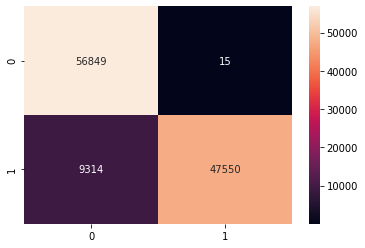

In [119]:
# evalution of modelling of Random Forest 

from sklearn.metrics import confusion_matrix , classification_report , roc_auc_score, accuracy_score 


print("Evalution of Model \n")
print("*********************\n")
print(accuracy_score(y_test,rf_pred))

print("\nConfusion Matrix \n")
print(confusion_matrix(y_test,rf_pred))



print("\nClassification Report\n")
print(classification_report(y_test,rf_pred))

print("\nROC_AUC_SCORE\n")
print(roc_auc_score(y_test,rf_pred))


print("\nHeatmap Of confusion matrix\n")
sns.heatmap(confusion_matrix(y_test,rf_pred),annot =True,fmt='g')


LogisticRegression
Evalution of Model 

*********************

0.9451410382667417

Confusion Matrix 

[[55410  1454]
 [ 4785 52079]]

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56864
           1       0.97      0.92      0.94     56864

    accuracy                           0.95    113728
   macro avg       0.95      0.95      0.95    113728
weighted avg       0.95      0.95      0.95    113728


ROC_AUC_SCORE

0.9451410382667418

Heatmap Of confusion matrix



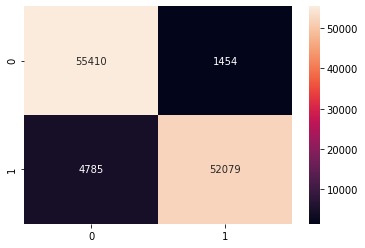

In [95]:
# Evalution for LogisticRegression

print("LogisticRegression")
print("Evalution of Model \n")
print("*********************\n")
print(accuracy_score(y_test,lg_pred))

print("\nConfusion Matrix \n")
print(confusion_matrix(y_test,lg_pred))



e

print("\nROC_AUC_SCORE\n")
print(roc_auc_score(y_test,lg_pred))


print("\nHeatmap Of confusion matrix\n")
sns.heatmap(confusion_matrix(y_test,lg_pred),annot =True,fmt='g')

In [96]:
# Testing acuracy in KNeighborsclassifier, SVC too


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



svc_pipeline = Pipeline([('ss',StandardScaler()),
                     ('pca',PCA(n_components=21)),
                     ('svc',SVC())])

knn_pipeline = Pipeline([('ss',StandardScaler()),
                     ('pca',PCA(n_components=21)),
                     ('knn',KNeighborsClassifier())])

In [107]:
# creating dictionary to check on cross_val_score


classifiers = {
               'LogisticRegression': lg_pipeline,
               'KNearest':knn_pipeline,
                'Support Vector Machine':svc_pipeline,
                'Ranndom Forest' :rf_pipeline }

In [108]:
# apply cross validation on every algorithm


from sklearn.model_selection import cross_val_score


for key,classifier in classifiers.items():
    training_score = cross_val_score(classifier,X_train,y_train,cv=5)
    print(f"{key} : {round(training_score.mean(),2)}")
    

LogisticRegression : 0.94
KNearest : 1.0
Support Vector Machine : 0.99
Ranndom Forest : 1.0


In [109]:
# Using Grid Search  to find the best Parameter

from sklearn.model_selection import GridSearchCV


# logistic Regression

log_reg_params = {"penalty": ['l1', 'l2'], 
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

#KNN 
knears_params = {"n_neighbors": list(range(2,5,1)), 
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_  # KNears best estimator


# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_   # SVC best estimator


# RandoFerest 
rf_params = {"criterion": ["gini", "entropy"], 
             "max_depth": list(range(2,4,1)), 
             "min_samples_leaf": list(range(5,7,1))}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_train, y_train)
randomforest = grid_rf.best_estimator_   # RandomForest best estimator



[0.         0.02556978 1.        ] [0.         0.91585186 1.        ] [2 1 0]


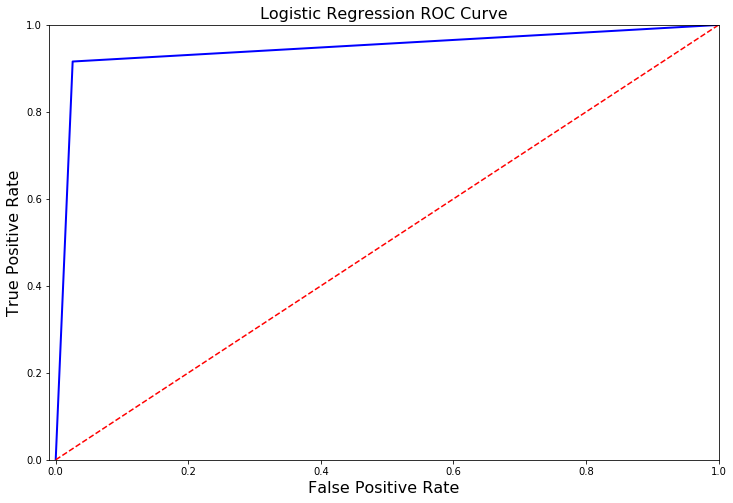

In [113]:
# Roc_ Curve plot


from sklearn.metrics import recall_score,roc_curve

log_fpr, log_tpr, log_thresold = roc_curve(y_test,lg_pred)


print(log_fpr,log_tpr,log_thresold)

def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

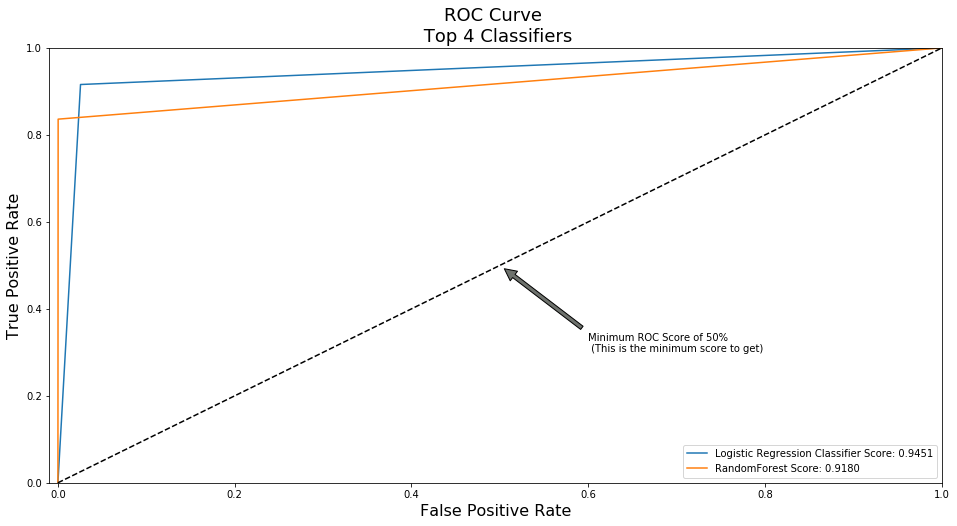

In [121]:
# ROC CURVE For Test DATA 

log_fpr, log_tpr, log_thresold = roc_curve(y_test,lg_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test,rf_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test,lg_pred)))

    plt.plot(rf_fpr, rf_tpr, label='RandomForest Score: {:.4f}'.format(roc_auc_score(y_test, rf_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, rf_fpr, rf_tpr)
plt.show()

##  Neural Networks Testing OverSampling (SMOTE)
In this section we will implement a simple Neural Network (with one hidden layer) on oversample(SMOTE)
for detecting fraud and non-fraud transactions.

In [25]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [36]:
# coulume features names are taken as  input of
n_input = X_train.shape[1]
n_input

30

In [38]:
# model

model = Sequential()
model.add(Dense(n_input,input_shape = (n_input,),activation = 'relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='softmax'))


In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [41]:
model.fit(X_train,y_train,validation_split=0.2,batch_size=25,epochs=20,shuffle= True ,verbose=2)


Train on 363921 samples, validate on 90981 samples
Epoch 1/20
 - 11s - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0092 - val_accuracy: 0.9985
Epoch 2/20
 - 10s - loss: 0.0068 - accuracy: 0.9983 - val_loss: 0.0022 - val_accuracy: 0.9998
Epoch 3/20
 - 10s - loss: 0.0052 - accuracy: 0.9988 - val_loss: 0.0011 - val_accuracy: 0.9998
Epoch 4/20
 - 10s - loss: 0.0041 - accuracy: 0.9990 - val_loss: 6.9850e-04 - val_accuracy: 1.0000
Epoch 5/20
 - 10s - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0031 - val_accuracy: 0.9992
Epoch 6/20
 - 10s - loss: 0.0030 - accuracy: 0.9992 - val_loss: 6.8716e-04 - val_accuracy: 1.0000
Epoch 7/20
 - 10s - loss: 0.0029 - accuracy: 0.9993 - val_loss: 2.1221e-04 - val_accuracy: 1.0000
Epoch 8/20
 - 10s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0012 - val_accuracy: 0.9999
Epoch 9/20
 - 13s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0017 - val_accuracy: 0.9998
Epoch 10/20
 - 13s - loss: 0.0022 - accuracy: 0.9995 - val_loss: 5.2212e-04 - val_accuracy

In [42]:
# predict test data 
prediction_sample = model.predict(X_test,batch_size = 200,verbose = 0)

In [44]:
prediction_sample

array([[1.2977509e-09, 1.0000000e+00],
       [1.0000000e+00, 9.8758057e-24],
       [1.0000000e+00, 0.0000000e+00],
       ...,
       [3.7311831e-10, 1.0000000e+00],
       [1.7837198e-02, 9.8216277e-01],
       [2.9446457e-07, 9.9999976e-01]], dtype=float32)

In [45]:
prediction_sampleclass = model.predict_classes(X_test,batch_size=200,verbose= 0 )
prediction_sampleclass

array([1, 0, 0, ..., 1, 1, 1])

confusion matrix of nearal network:

[[56827    37]
 [ 7465 49399]]


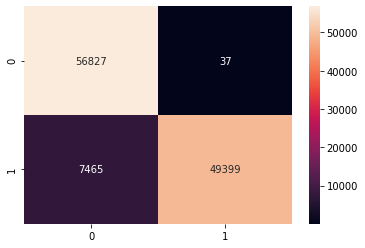

In [48]:
# confusion matrix

from sklearn.metrics import confusion_matrix

print("confusion matrix of nearal network:\n")
print(confusion_matrix(y_test,prediction_sampleclass))


sns.heatmap(confusion_matrix(y_test,prediction_sampleclass),annot= True,fmt = 'g')